In [100]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.stats as st
import sys
import os
sys.path.append("..") 
import importlib
import functions.calc_mcf as calc_mcf
import functions.calc_projection as cp
import functions.data_class as data_class
importlib.reload(calc_mcf)
importlib.reload(cp)
importlib.reload(data_class)




import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
dpi = 200
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi
plt.style.use(['science','ieee'])
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams["text.usetex"] = False

In [101]:
def read_data(file):
    with h5py.File(file, 'r') as data:
        my_data = {key: data[key][()] for key in data.keys()}
    return my_data

In [61]:
# Loop through all file output from get_projection_mpi.py!.

projection_path = '../h5_projected'
version = 'g1040_0016_binary_search_10000_fib', 'g1041_9015_by_mass_10000_fib'
n_rank = 25
n_file = 16

for rank_id in range(n_rank):
    for file_id in range(1, n_file + 1):
        file_name = f"r{rank_id:02d}_{file_id:02d}_map.h5"
        if not os.path.exists(os.path.join(projection_path, version[0], file_name)):
            print(f"{file_name} -- ")

In [102]:
para_main_file = os.path.join(projection_path, version[0], 'main.h5')
perp_main_file = os.path.join(projection_path, version[1], 'main.h5')

para_data = data_class.main_data(para_main_file)
perp_data = data_class.main_data(perp_main_file)

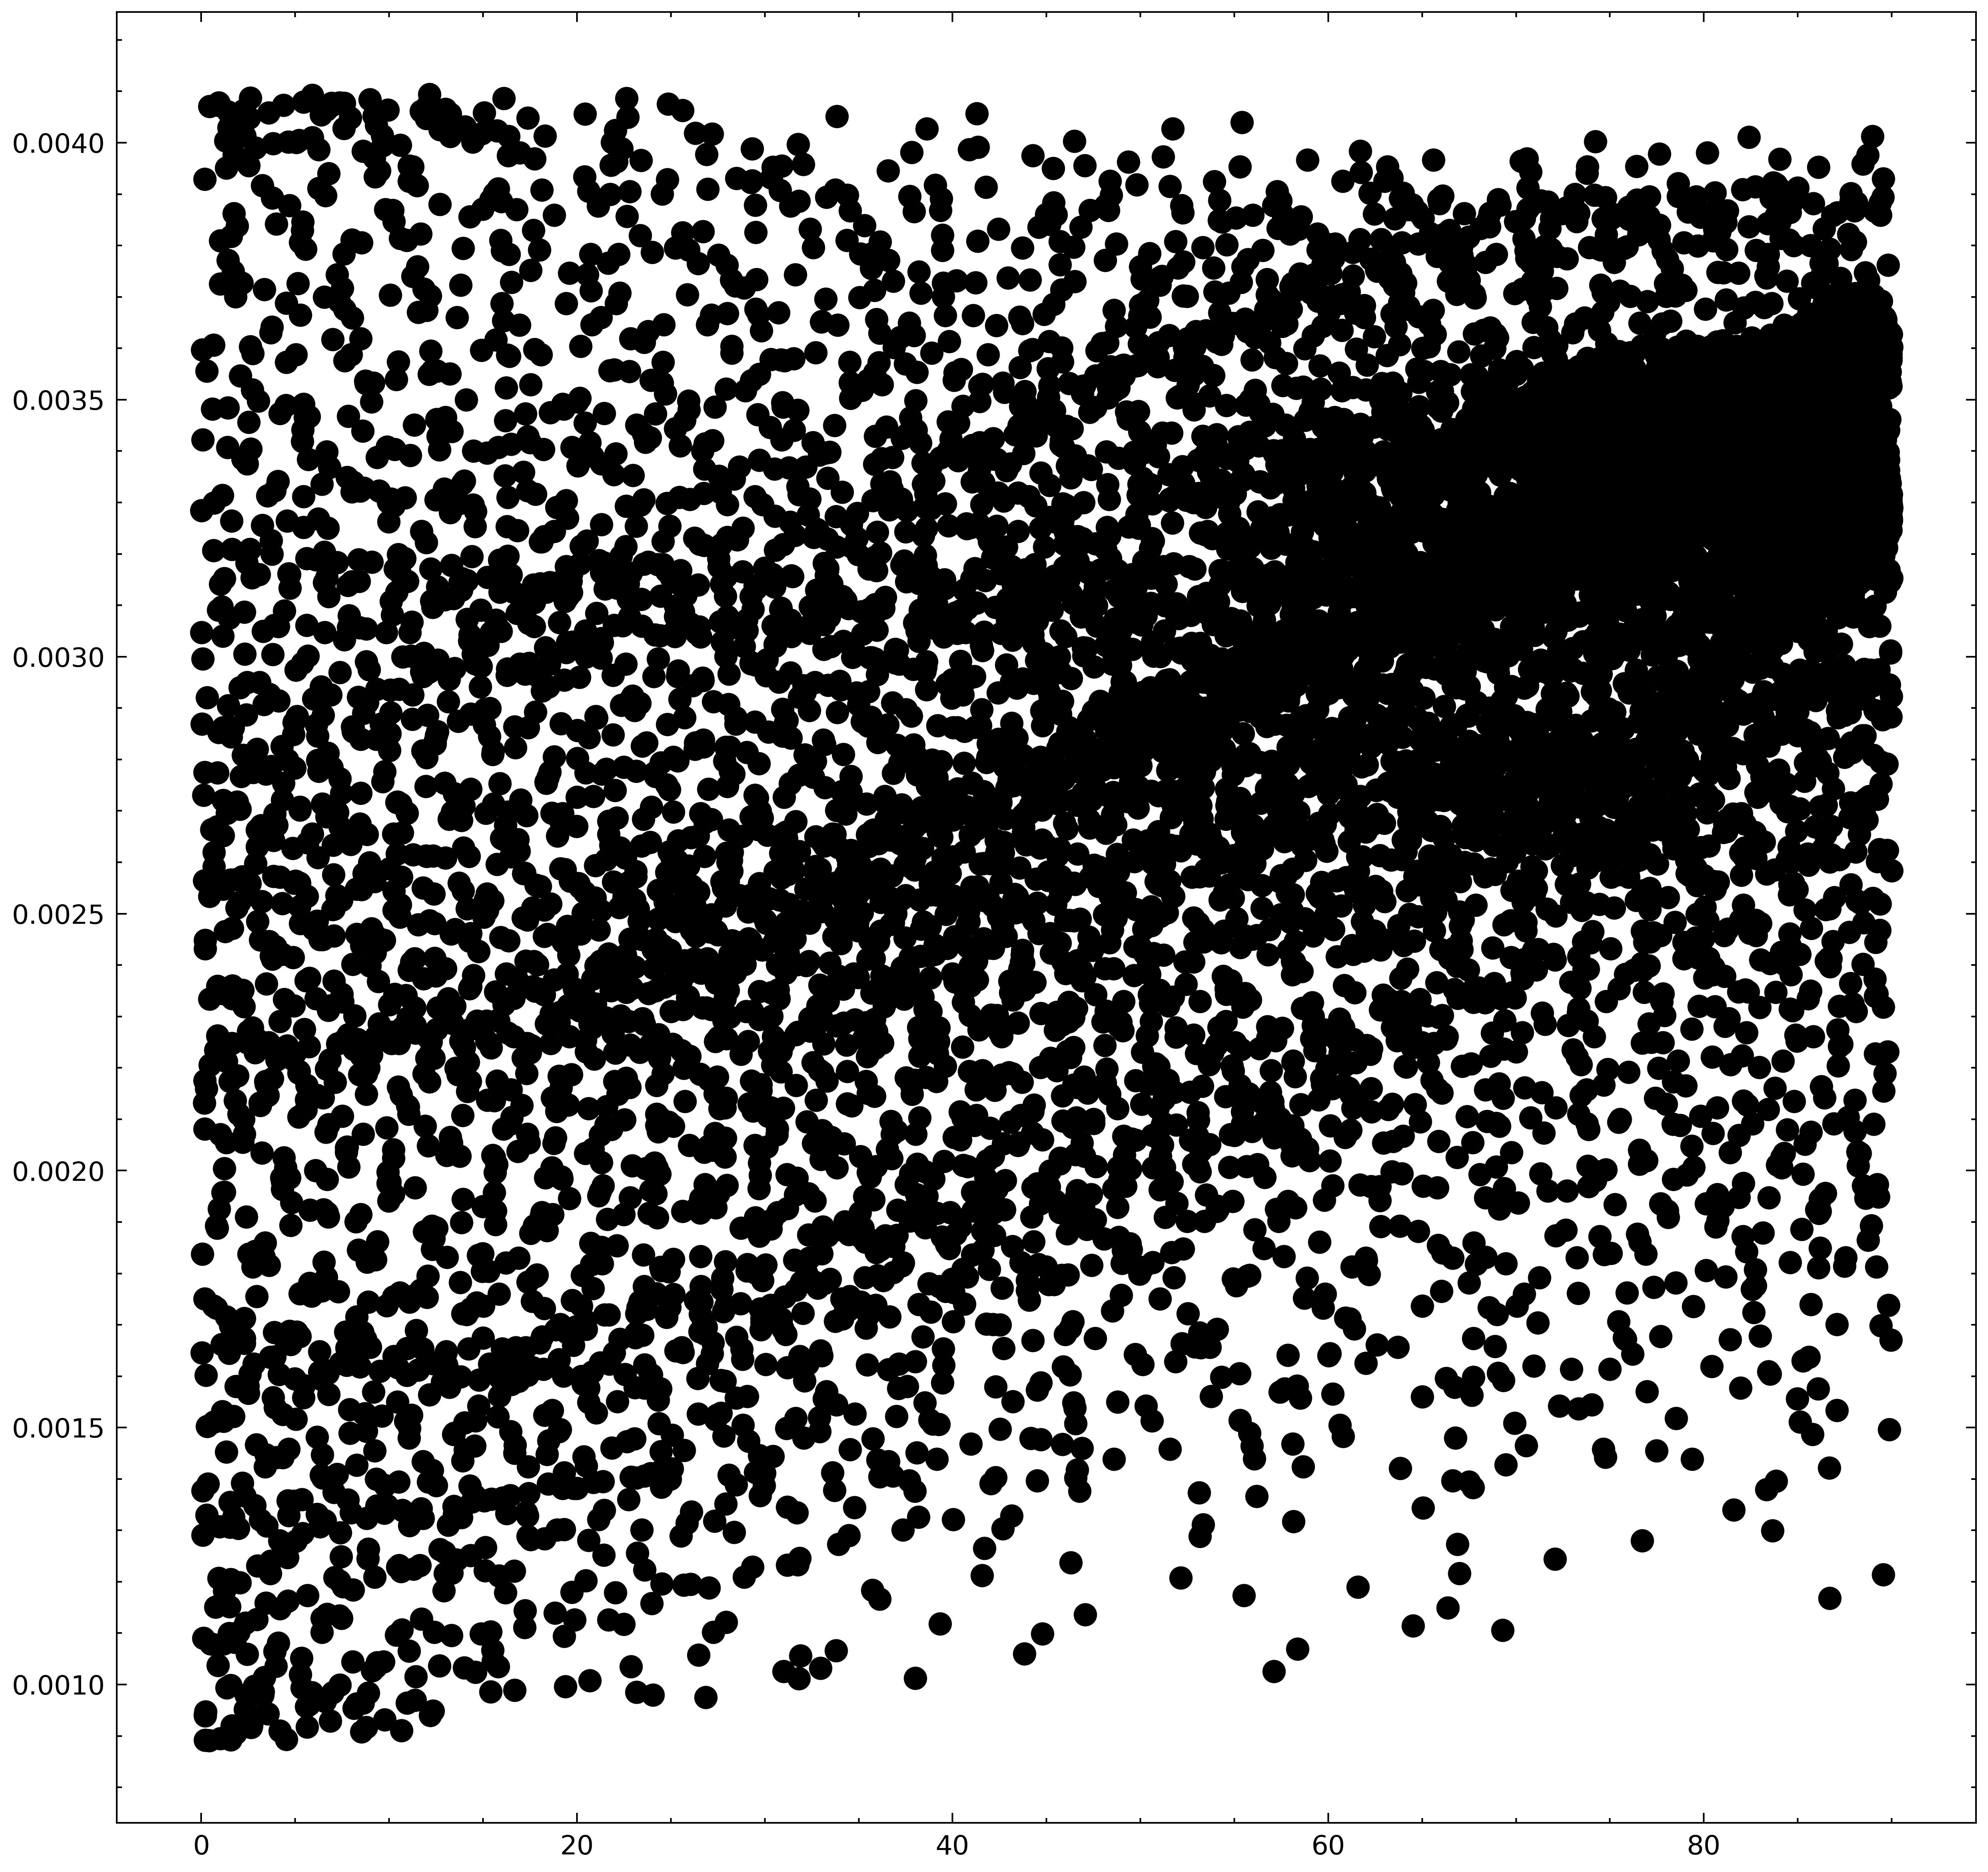

In [105]:
plt.scatter(perp_data['b_offset'], perp_data['mcf_slope'])


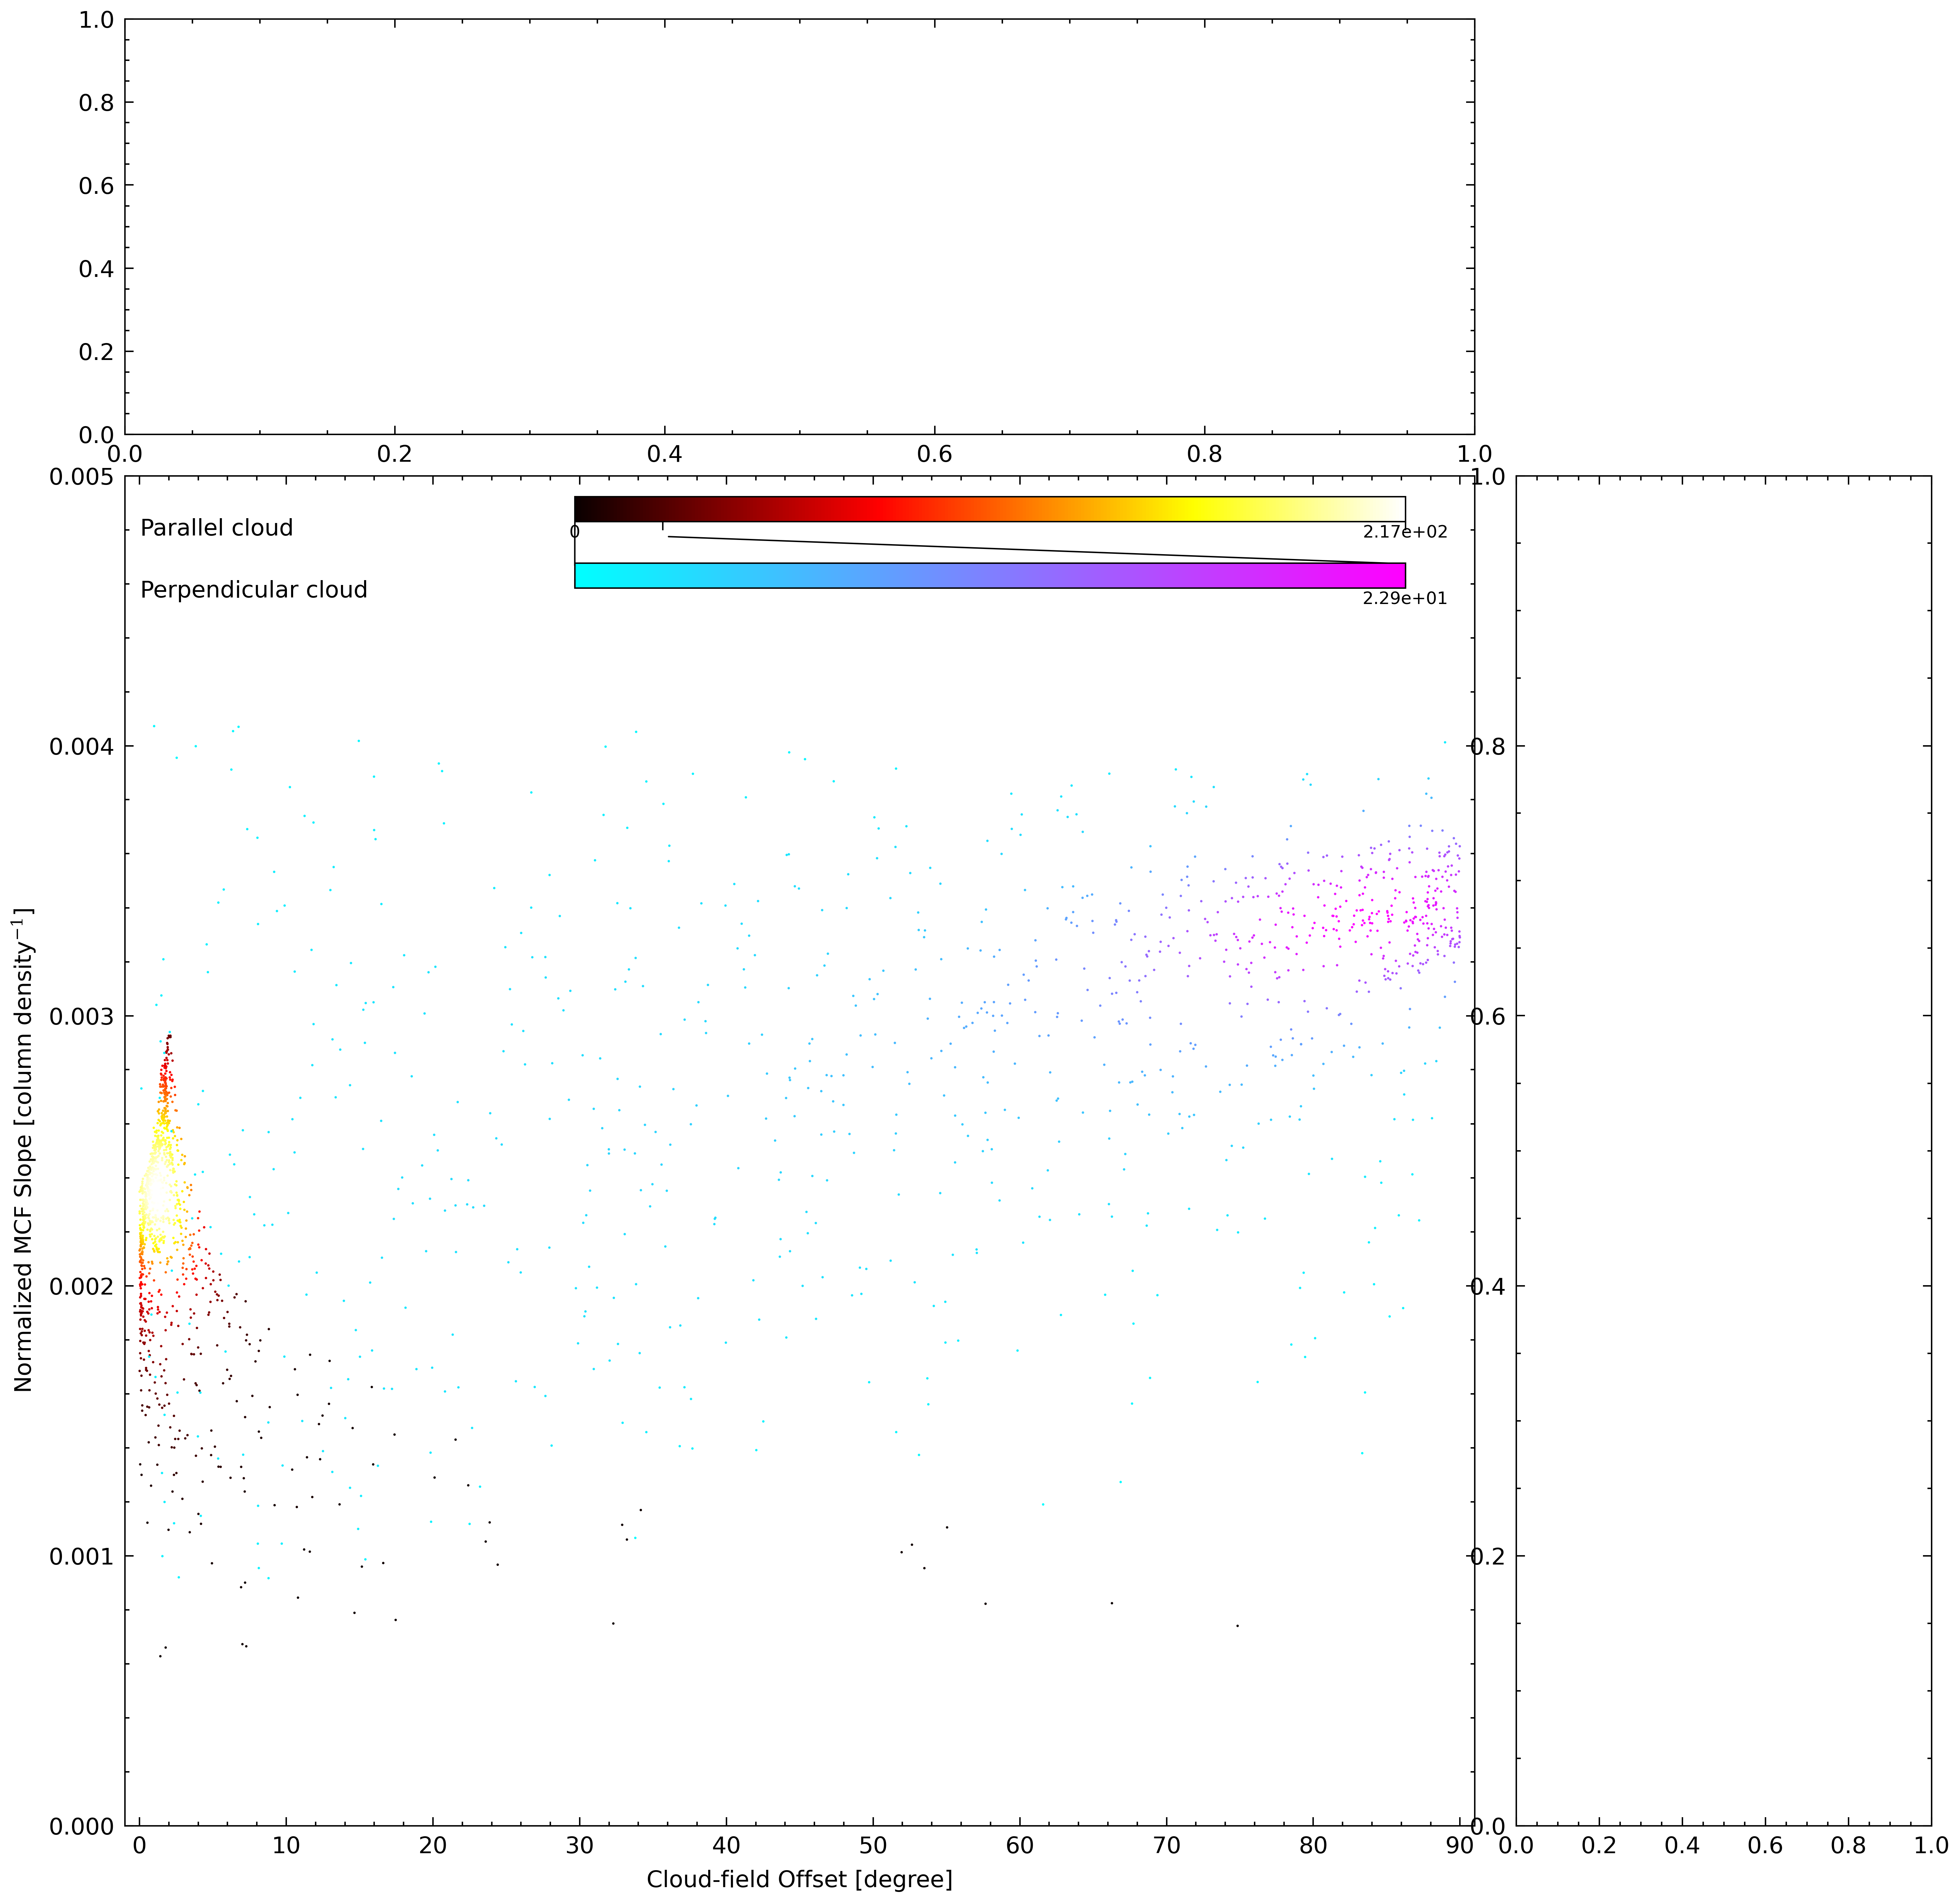

In [99]:
plot_color = ["red", "blue"]
plot_label = ["Parallel cloud", "Perpendicular cloud"]
plot_marker = ['o', 'o']

skip = slice(None, None, 10)

x1, y1 = para_data['b_offset'][skip], para_data['mcf_slope'][skip]
x2, y2 = perp_data['b_offset'][skip], perp_data['mcf_slope'][skip]


l, w = .1, .65
b, h = l, w
bh = lh = l + w + 0.02

rec_scat = [l, b, w, h]
rec_hisx = [l, bh, w, 0.2]
rec_hisy = [lh, b, .2, h]

# xy = np.vstack([np.concatenate([x1, x2]), np.concatenate([y1, y2])])
xy1, xy2 = np.vstack([x1, y1]), np.vstack([x2, y2])
z1, z2 = st.gaussian_kde(xy1)(xy1), st.gaussian_kde(xy2)(xy2)

buff = 0.01
lc = 0.4
hc = 0.012
rec_cax1 = [l + w/3, l + h - hc - buff, lc, hc]
rec_cax2 = [l + w/3, l + h - hc - 3*buff - hc, lc, hc]


plt.figure(1)
ax_sac = plt.axes(rec_scat)
ax_hx = plt.axes(rec_hisx)
ax_hy = plt.axes(rec_hisy)
ax_c1 = plt.axes(rec_cax1)
ax_c2 = plt.axes(rec_cax2)

clim1, clim2 = np.max(z1), np.max(z2) 

s1 = ax_sac.scatter(x1, y1, s=0.7, c=z1, marker='o', alpha=1, cmap='hot', linewidths=0)
s2 = ax_sac.scatter(x2, y2, s=0.7, c=z2, marker='o', alpha=1, cmap='cool', linewidths=0)

s1.set_clim(0, np.max(clim1))
s2.set_clim(0, np.max(clim2))

cb1 = plt.colorbar(s1, cax=ax_c1, orientation='horizontal')
cb2 = plt.colorbar(s2, cax=ax_c2, orientation='horizontal')

if clim2 > clim1:
    cb1.set_ticks([0, clim1])
    cb2.set_ticks([0, clim1, clim2])
    cb1.set_ticklabels(['', f'{clim1:.2e}'])
    cb2.set_ticklabels([r'0', f'{clim1:.2e}' , f'{clim2:.2e}'])

elif clim2 < clim1:
    cb1.set_ticks([0, clim2, clim1])
    cb2.set_ticks([0, clim2])
    cb1.set_ticklabels([r'', '', f'{clim1:.2e}'])
    cb2.set_ticklabels(['0', f'{clim2:.2e}'])
    

ax_c1.annotate('', xy=(clim2/clim1, -.6), xycoords='axes fraction', xytext=(1, -1.7),
                arrowprops=dict(arrowstyle="-", color='black', linestyle='solid', linewidth=0.5, alpha=1))
ax_c1.annotate('', xy=(0, 0), xycoords='axes fraction', xytext=(0, -2),
                arrowprops=dict(arrowstyle="-", color='black', linestyle='solid', linewidth=0.5, alpha=1))


cb1.ax.tick_params(axis='x', direction='out', pad=-2, labelsize=6)
cb2.ax.tick_params(axis='x', direction='in', pad=1, labelsize=6)
ax_c1.minorticks_off()
ax_c2.minorticks_off()
# cb2.ax.tick_params(labelcolor = 'white')
# cb2.set_label('Perpendicular Cloud', labelpad=-12)

ax_sac.text(0.05, 0.00478, 'Parallel cloud')
ax_sac.text(0.05, 0.00455, 'Perpendicular cloud')

ax_sac.set_xlabel("Cloud-field Offset [degree]")
ax_sac.set_ylabel("Normalized MCF Slope [column density$^{-1}$]")

ax_sac.set_ylim(0, 0.005)
ax_sac.set_xlim(-1, 90+1)

# legend_elements = [Line2D([0], [0], marker = plot_marker[0], color = 'red', label = plot_label[0], markersize = 5, lw = 0),
#                    Line2D([0], [0], marker = plot_marker[1], color = 'blue', label = plot_label[1], markersize = 5, lw = 0)]

# # ax_sac.set_facecolor((0.7, 0.7, 0.7))
# ax_sac.legend(handles = legend_elements, loc = 'lower center', ncol = 2)
ax_sac.set_xticks(np.linspace(0, 90, 10),
                    ["%d" % i for i in np.linspace(0, 90, 10)])
ax_sac.set_yticks(np.linspace(0, 0.005, 6), [
                    "%.3f" % i for i in np.linspace(0, 0.005, 6)])
# ax_sac.set_title('MCF Slope versus Cloud-field Offset')

# # histogram for offset
# bin1 = np.linspace(0, 90, 150)
# ax_hx.hist(x1, bins=bin1, density=True,
#             color=plot_color[0], alpha=0.5, label='Parallel cloud')
# ax_hx.hist(x2, bins=bin1, density=True,
#             color=plot_color[1], alpha=0.5, hatch='///////', histtype='step', lw=0, label='Perpendicular cloud')
# ax_hx.set_xlim(-1, 90+1)
# ax_hx.set_xticks(np.linspace(0, 90, 10),
#                     ["" for i in np.linspace(0, 90, 10)])
# # ax_hx.set_yticks(np.linspace(0, 20, 2), [
# #                     "" for i in np.linspace(0, 20, 2)])
# ax_hx.legend(loc='upper center', ncol=2)

# # histogram for offset
# bin2 = np.linspace(0, 0.005, 150)
# ax_hy.hist(y1, bins=bin2, density=True,
#             color=plot_color[0], alpha=0.5, orientation='horizontal', label='Parallel cloud')
# ax_hy.hist(y2, bins=bin2, density=True, edgecolor=plot_color[1], alpha=0.5,
#             orientation='horizontal', hatch='///////', histtype='step', lw=0, label='Perpendicular cloud')
# ax_hy.set_ylim(0, 0.005)
# ax_hy.set_yticks(np.linspace(0, 0.005, 6), [
#                     "" for i in np.linspace(0, 0.005, 6)])
# ax_hy.set_xticks(np.linspace(0, 2000, 2), [
#                     "" for i in np.linspace(0, 2000, 2)])

# plt.savefig('./fig/mcf_vs_offset_%s.png' % fn, dpi = dpi)
plt.show()